# **Week 10 Activity (Data Pre-processing)**

### Tasks

Do the following on the dataset

1. Load the data into the pandas environment and identify some basic details of the dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score.
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10. Do the standard scaling on the feature performance score.

In [18]:
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd
# Importing Matplotlibrary's PyPlot as plt
import matplotlib.pyplot as plt
# Importing seaborn as sns
import seaborn as sns

### T1. Load the data into the pandas environment and identify some basic details of the dataset.

In [28]:
# Loading the data into the Pandas Dataframe
edata=pd.read_csv('employee.csv')

In [29]:
# Getting the basic information of the Dataframe
edata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [30]:
# Displaying the Dataframe (Small in size)
edata

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [22]:
edata.isna().sum().to_frame('Null value count')

,Null value count
name,0
age,2
income,2
gender,2
department,0
grade,0
performance_score,0


In [23]:
# Getting statistical data of Qualitative Data
edata.describe(include=['object'])

,name,gender,department,grade
count,9,7,9,9
unique,9,2,3,4
top,Allen Smith,F,Operations,G3
freq,1,5,3,5


In [24]:
# Getting statistical data of Quantitative Data
edata.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


<AxesSubplot:xlabel='performance_score', ylabel='gender'>

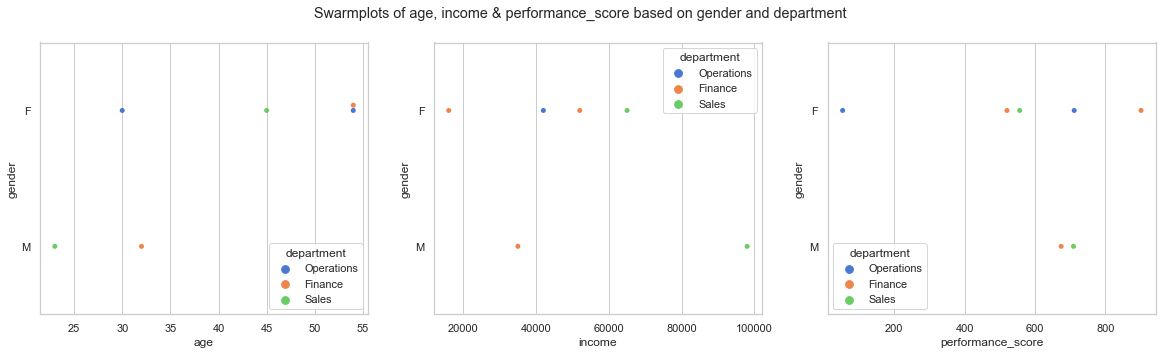

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('Swarmplots of age, income & performance_score based on gender and department')

sns.set_theme(style="whitegrid", palette="muted")

sns.swarmplot(ax=axes[0], data=edata, x="age", y="gender", hue="department")
sns.swarmplot(ax=axes[1], data=edata, x="income", y="gender", hue="department")
sns.swarmplot(ax=axes[2], data=edata, x="performance_score", y="gender", hue="department")

### Insights :
* This Dataframe contains the performance details (9 Category) of 7 persons in a company.
* 3 Columns (age, income & gender) contain Null values.
*   The range of values:
      *   The **age** ranges from **23 to 54**
      *   The **income** ranges from **6000 to 98000**
      *   The **performance score** ranges from **53 to 901**
* One enry in the performance_score column should be be considered as a potential outlier (Pointing a low performing employee)
* Most of the employees are Male.
* This dataframe needs pre-processing inorder make it suitable for more analytics 

### T2. Reset the index as "name" as the index.

In [57]:
# Setting name column as the index
edata.set_index('name', inplace=True)
# To delete the default name assigned for Index after the above operation
# tdata.index.name = None
edata.head(5)

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


### T3. Select rows for specific names Jack Morgan and Josh wills.

In [61]:
edata.loc[['Jack Morgan', 'Josh Wills']]
# Alt. Method edata.iloc[[2,7]]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### T4. Select data for multiple values "Sales" and “Finance”.

In [62]:
edata.apply(lambda row: row[edata.department.isin(['Sales','Finance'])])

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### T5. Display employee who has more than 700 performance score.

In [63]:
edata[edata.performance_score>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### T6. Display employee who has more than 500 and less than 700 performance score.

In [64]:
edata[(edata.performance_score>500) & (edata.performance_score<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


### T7. Check and handle missing values in the dataset.

Our Dataframe only consists of about 7 entries, it makes it much easier to get insights from it.

+ For Age & Income we are going to use median as the filler
+ For gender field, we can do it by simple logic rather than interpreting from the statistical values

In [66]:
# Filling NaN values in Age & Income columns
for i in ['age', 'income']:
  edata[i]=edata[i].fillna(edata[i].median())

In [68]:
edata

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [73]:
# NaN Fix for Gender column
edata.gender.fillna("M", inplace=True)

In [74]:
# Preview
edata

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,M,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,M,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### T8. Check the outliers and handle outliers in performance score using Percentiles.

>Violinplots before removing outliers

<AxesSubplot:ylabel='performance_score'>

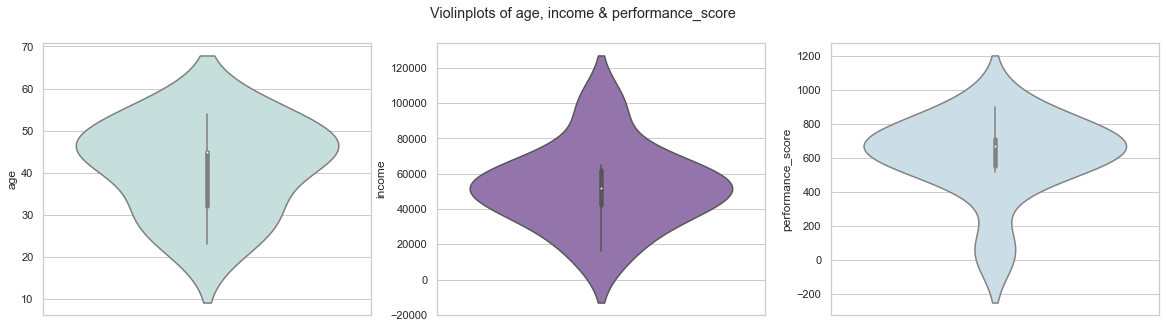

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('Violinplots of age, income & performance_score')

sns.set_theme(style="whitegrid", palette="muted")
sns.violinplot(ax=axes[0], y="age", data=edata, palette="ch:rot=-.25")
sns.violinplot(ax=axes[1], y="income", data=edata, palette="light:m_r")
sns.violinplot(ax=axes[2], y="performance_score", data=edata, palette="ch:s=.25,rot=-.25")

In [109]:
# Getting lower and upperlimit of the outliers from percentile
Q1=np.percentile(edata.performance_score,25,interpolation='midpoint')
Q2=np.percentile(edata.performance_score,50,interpolation='midpoint')
Q3=np.percentile(edata.performance_score,75,interpolation='midpoint')

IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
outliers=[]
for i in edata.performance_score:
    if i > upper_limit or i < lower_limit:
        outliers.append(i)

print(len(outliers),'Oulier(s) is(are) there in performance_score column and they are given below:\n',outliers)

1 Oulier(s) is(are) there in performance_score column and they are given below:
 [53]


In [111]:
edata.loc[edata.performance_score<lower_limit]

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,52000.0,F,Operations,G3,53


In [113]:
edata.drop(edata.loc[edata.performance_score<lower_limit].index, inplace=True)

In [116]:
edata.shape

(8, 6)

> Violinplots after removing outliers

<AxesSubplot:ylabel='performance_score'>

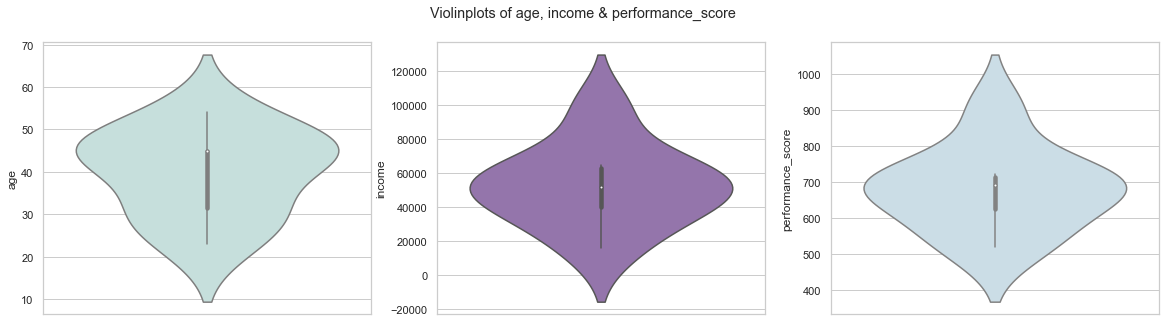

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('Violinplots of age, income & performance_score')

sns.set_theme(style="whitegrid", palette="muted")
sns.violinplot(ax=axes[0], y="age", data=edata, palette="ch:rot=-.25")
sns.violinplot(ax=axes[1], y="income", data=edata, palette="light:m_r")
sns.violinplot(ax=axes[2], y="performance_score", data=edata, palette="ch:s=.25,rot=-.25")

### T9. Check the gender column and do Dummy encoding.

In [118]:
edata_01 = pd.get_dummies(edata.gender, prefix='Gender_')
edata_01

,Gender__F,Gender__M
name,,
Allen Smith,0,1
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,0,1
Josh Wills,1,0
Leo Duck,0,1


In [119]:
edata = pd.merge(left=edata, right=edata_01, left_index=True, right_index=True)
edata

,age,income,gender,department,grade,performance_score,Gender__F,Gender__M
name,,,,,,,,
Allen Smith,45.0,52000.0,M,Operations,G3,723,0,1
S Kumar,45.0,16000.0,F,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,M,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,F,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,M,Sales,G3,649,0,1
Josh Wills,54.0,52000.0,F,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,M,Sales,G4,709,0,1


### T10. Do the standard scaling on the feature performance score.

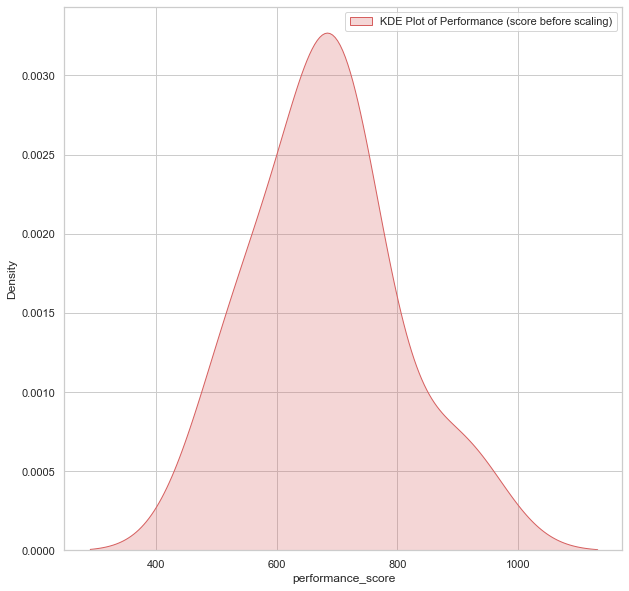

In [125]:
# Plotting a kde plot for the features Total Marks Vs Gender
plt.figure(figsize=(10, 10))
sns.kdeplot(edata.performance_score, label="KDE Plot of Performance (score before scaling)", shade = True, color = 'r')
plt.legend()

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
performance_score=edata.performance_score.values.reshape(-1,1)
performance_score=scaler.fit_transform(performance_score)
performance_score=pd.DataFrame(performance_score)

In [135]:
performance_score.rename(columns = {0:'Scaled Performance Score'}, inplace = True)
performance_score

,Scaled Performance Score
0,0.392262
1,-1.475872
2,-0.058667
3,-1.144578
4,0.281831
5,-0.288733
6,2.030331
7,0.263425


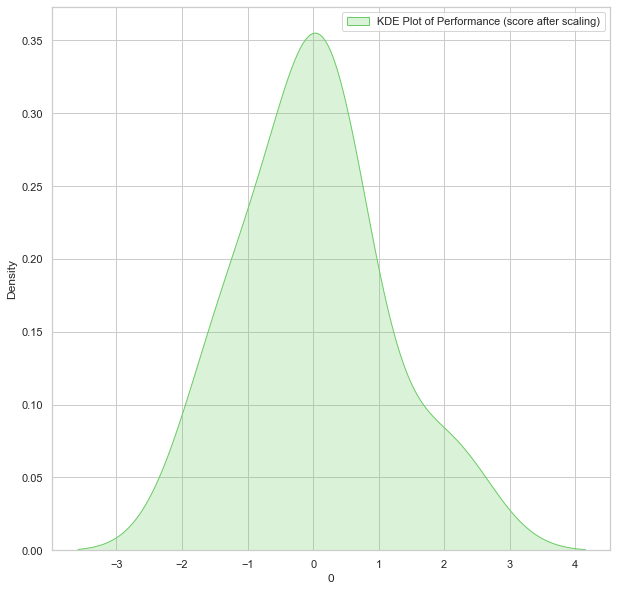

In [133]:
# Plotting a kde plot for the features Total Marks Vs Gender
plt.figure(figsize=(10, 10))
sns.kdeplot(performance_score[0], label="KDE Plot of Performance (score after scaling)", shade = True, color = 'g')
plt.legend()

*End of the file reached!*